# WISCS
Word and image shared conceptual space

In [1]:
from utils import simulate, plot, overlap, t
import matplotlib.pyplot as plt 
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False

# Parameters

In [12]:
x_word = 230 # time to access conceptual space for lexical input
x_image = 150 # time to access conceptual space for visual input
task = 500 # time it takes to complete semantic task
sigma = 10 # some noise
n_iter = 1000

In [13]:
wd, id = simulate(x_word, x_image, task, sigma, n_iter)

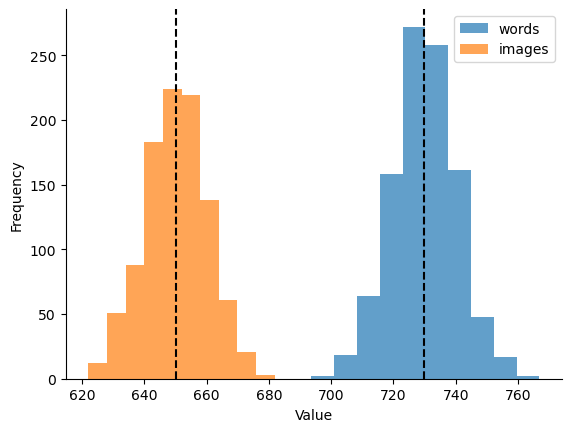

In [14]:
plot(wd, id)
plt.savefig('figs/diff.png', dpi=500)

## Are these distributions different?

In [8]:
t(wd, id)

t-statistic: 181.57281542623355, p-value: 0.0


(181.57281542623355, 0.0)

# Now let's look at no difference

In [18]:
x_word = 200
x_image = 200

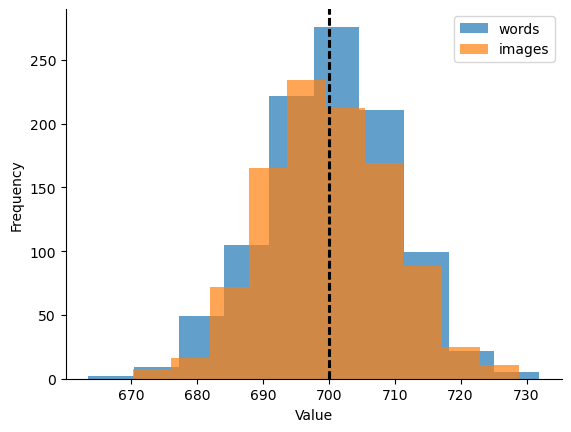

In [19]:
wd1, id1 = simulate(x_word, x_image, task, sigma, n_iter)
plot(wd1, id1)
plt.savefig('figs/same.png', dpi=500)

# Now looking at multiple tasks

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
tasks = np.array([450, 300, 500, 500]) # ms reaction times
x_ws = np.array([200, 200, 230, 150]) # word ms access times
x_is = np.array([200, 150, 215, 150]) # iamage ms access times

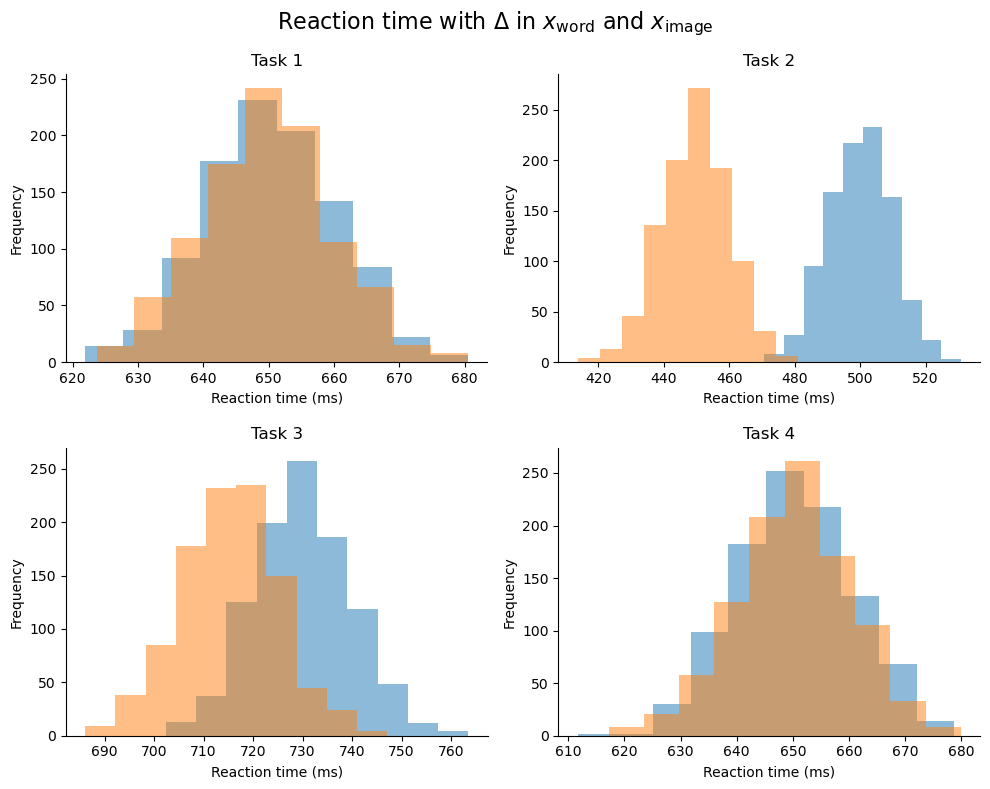

In [34]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
for tidx, (t, a) in enumerate(zip(tasks, ax.flatten())):
    wd, id = simulate(x_ws[tidx], x_is[tidx], t, sigma, n_iter)
    a.hist(wd, alpha=0.5)
    a.hist(id, alpha=0.5)
    a.set_ylabel('Frequency')
    a.set_xlabel('Reaction time (ms)')
    a.set_title(f'Task {tidx +1}')

plt.tight_layout(h_pad=2)
fig.subplots_adjust(top=0.9)
plt.suptitle(r'Reaction time with $\Delta$ in $x_{\text{word}}$ and $x_{\text{image}}$', fontsize=16)

plt.savefig('figs/diff_tasks.png', dpi=500)

plt.show()